In [311]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
from numpy import genfromtxt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
import math

In [312]:
systoleFile = 'Systole BP Updated.xlsx'
writerSys = pd.ExcelWriter(systoleFile, engine = 'openpyxl')
diastoleFile = 'Diastole BP Updated.xlsx'
writerDia = pd.ExcelWriter(diastoleFile, engine = 'openpyxl')

In [313]:
systolicBP = pd.read_csv('Systolic BP.csv')
diastolicBP = pd.read_csv('Diastolic BP.csv')

In [314]:
systole = pd.DataFrame(systolicBP)
diastole = pd.DataFrame(diastolicBP)

In [315]:
systole.head()

,Zung Score,Blood Pressure
0,26.065231,125.953125
1,30.095773,135.921875
2,35.015473,136.265625
3,35.011529,134.031250
4,34.995752,125.093750


In [316]:
diastole.head()

,Zung Score,Blood pressure
0,26.074209,77.244309
1,30.052148,87.297439
2,34.971259,88.348569
3,35.101341,81.249324
4,35.105250,76.227688


In [317]:
scoresSystole = systole["Zung Score"]
scoresDiastole = diastole["Zung Score"]

In [318]:
bpSystole = systole["Blood Pressure"]
bpDiastole = diastole["Blood pressure"]

In [319]:
def plotGraph(x, y, bpType):
    plt.scatter(x, y, c='b', marker='o')
    plt.xlabel('Zung Score', fontsize=16)
    plt.ylabel(bpType + ' BP', fontsize=16)
    plt.title('Zung Score vs ' + bpType + ' BP', fontsize=20)
    plt.show()

In [320]:
def plotOutlier(data, x, y, bpType, myEps):
    bp_data = data.iloc[:, 0:2].values

    # DBSCAN model with parameters
    model = DBSCAN(eps=myEps, min_samples=3).fit(bp_data)
    print(model)
    colors = model.labels_
    plt.scatter(x, y, c=colors, marker='o')
    plt.xlabel('Zung Score', fontsize=16)
    plt.ylabel(bpType + ' BP', fontsize=16)
    plt.title('Zung Score vs ' + bpType +' BP', fontsize=20)
    plt.show()

In [321]:
def linRegVals(data):
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    n = np.size(X)
    x_mean,y_mean

    Sxy = np.sum(X*Y)- n*x_mean*y_mean
    Sxx = np.sum(X*X)-n*x_mean*x_mean

    b1 = Sxy/Sxx
    b0 = y_mean-b1*x_mean
    print('The slope is', b1)
    print('The y intercept is', b0)

In [322]:
def linearRegression(data):
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    r2 = linear_regressor.score(X, Y)
    r = math.sqrt(r2)
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    linRegVals(data)
    print("R value is " + str(r))

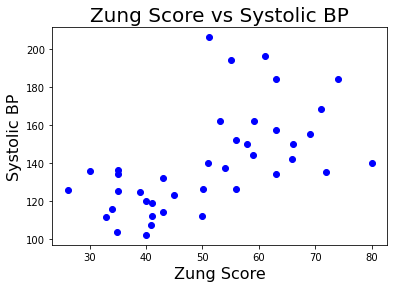

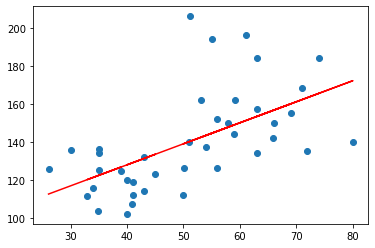

The slope is 1.1025785197064164
The y intercept is 83.9272962670131
R value is 0.5780249794897973


In [323]:
plotGraph(scoresSystole, bpSystole, 'Systolic')
linearRegression(systole)

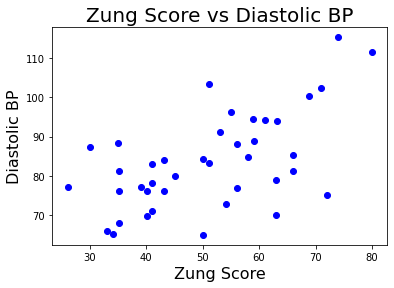

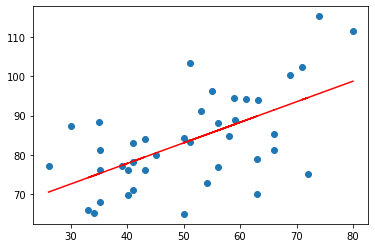

The slope is 0.5230388486708706
The y intercept is 56.925311099538405
R value is 0.5886043526773077


In [324]:
plotGraph(scoresDiastole, bpDiastole, 'Diastolic')
linearRegression(diastole)

DBSCAN(eps=10, min_samples=3)


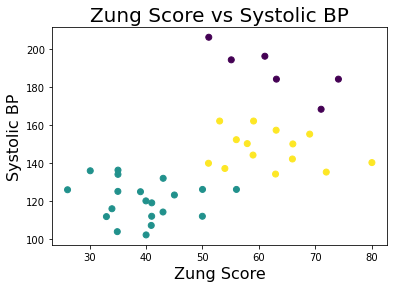

In [325]:
plotOutlier(systole, scoresSystole, bpSystole, 'Systolic', 10)

DBSCAN(eps=15, min_samples=3)


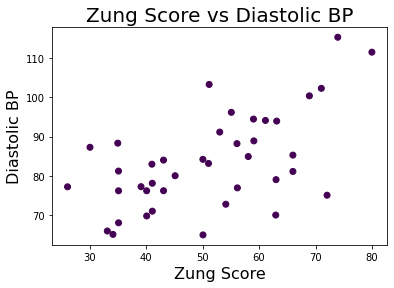

In [326]:
plotOutlier(diastole, scoresDiastole, bpDiastole, 'Diastolic', 15)

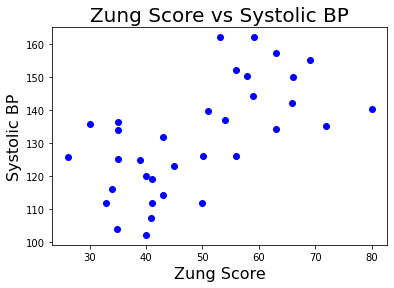

In [327]:
systoleParsed = systole['Blood Pressure'] < 167
systoleParsed = (systole[systoleParsed])
plotGraph(systoleParsed["Zung Score"], systoleParsed['Blood Pressure'], 'Systolic')

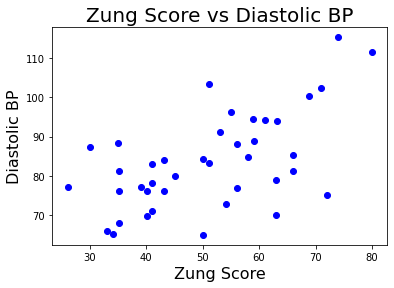

In [328]:
diastoleParsed = diastole['Blood pressure'] < 150
diastoleParsed = (diastole[diastoleParsed])
plotGraph(diastoleParsed["Zung Score"], diastoleParsed['Blood pressure'], 'Diastolic')

Systole with Regression


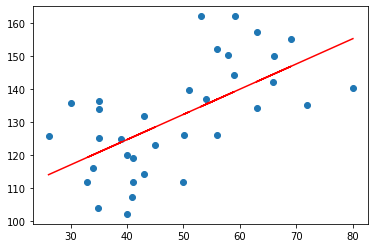

The slope is 0.7622526417993406
The y intercept is 94.23469158273771
R value is 0.6168780488232907


In [329]:
print("Systole with Regression")
linearRegression(systoleParsed)

Diastole with Regression


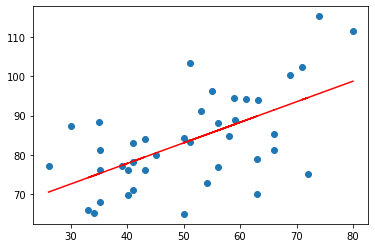

The slope is 0.5230388486708706
The y intercept is 56.925311099538405
R value is 0.5886043526773077


In [330]:
print("Diastole with Regression")
linearRegression(diastoleParsed)

In [331]:
diastoleParsed.to_excel(writerDia, index = False)
writerDia.save()

In [332]:
systoleParsed.to_excel(writerSys, index = False)
writerSys.save()